## 1. Shannon's theorem in use.

In [6]:
from __future__ import division
import numpy as np
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import pylab as pl

Hereafter, we define a continuous signal that we sample and then we use Shannon's interpolation formula.

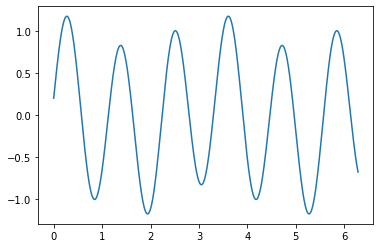

In [14]:
def mySignal(t):
    fq = 0.9
    fq2 = 0.3
    return np.sin(2*np.pi * fq*t) + 0.2*np.cos(2*np.pi * fq2*t)
x = np.linspace(0,2*np.pi,1000)
plt.plot(x,mySignal(x))
plt.show()

### Ex. Choose a sampling time $T_e$, sample this signal and then show the reconstruction using linear interpolation.

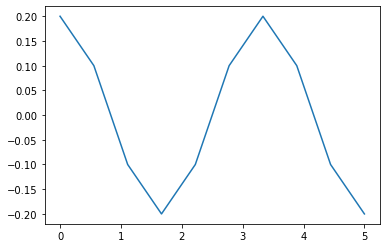

In [15]:
fq = 0.9
fq2 = 0.3
Te = 1/(2*max(fq,fq2))
# fe = 1/Te
N = int((2*np.pi)/Te)
sampled_signal = []
x0 = []

for i in range(0, N-1):
    n = i * Te
    sampled_signal.append(mySignal(n))
    x0.append(n)

pl.plot(x0, sampled_signal)
pl.show()

### Ex. Implement Shannon's reconstruction function and implement the associated reconstruction formula. Change the input signal and compare with linear interpolation. What do you observe?

$sinc(t) = \frac{sin(\pi t)}{(\pi t)} $ avec $sinc(0) = 1$

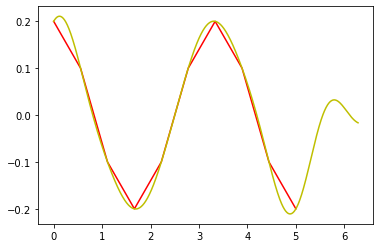

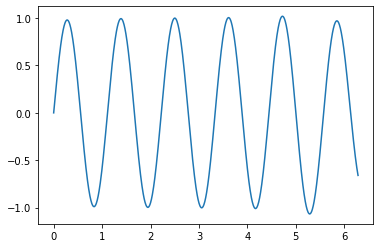

In [23]:
def sinc(t):
    x_temp = (np.pi*t) / Te
    return 1 if t == 0 else np.sin(x_temp) / x_temp

def shannon_reconstruct(t):
    signal_sum = 0
    for i in range(0, N-1):
        nTe = i * Te
        signal_sum += sampled_signal[i] * sinc(t-nTe)
    return signal_sum

shannon = np.vectorize(shannon_reconstruct)

x = np.linspace(0, 2 * np.pi, N-1)
x_analog = np.linspace(0, 2*np.pi, 1000)

pl.plot(x0, sampled_signal, 'r')
pl.plot(x_analog, shannon(x_analog), 'y')
pl.figure()
pl.plot(x_analog, mySignal(x_analog) - shannon(x_analog))
pl.show()

### Let us now observe the aliasing phenomenon by subsampling an image which presents high-frequency information.

(599, 493, 3)


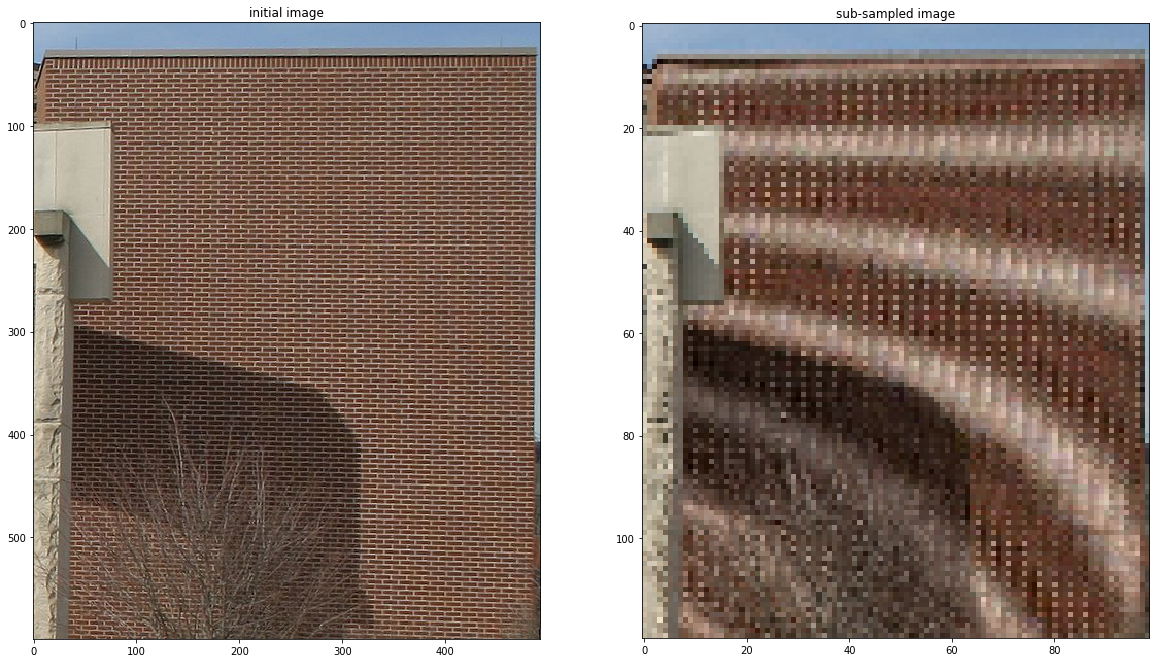

In [24]:
import imageio as imio
colored_image = imio.imread('Moire.jpg')
sub_defense = colored_image[::5,::5,:]
print(np.shape(colored_image))
#plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("initial image")
plt.imshow(colored_image)
plt.subplot(1,2,2)
plt.title("sub-sampled image")
plt.imshow(sub_defense)

(240, 365)


<Figure size 432x288 with 0 Axes>

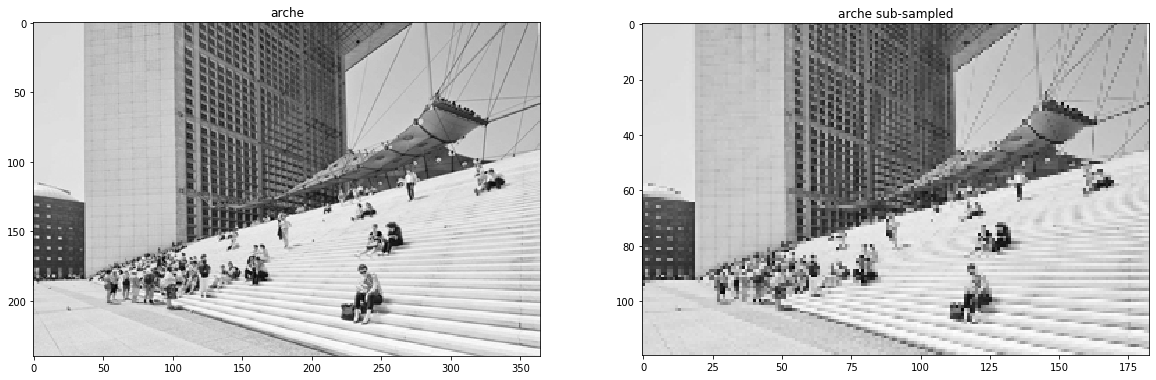

In [25]:
import imageio as imio
colored_image = imio.imread('services_0.jpg')
defense = np.sum(colored_image*[ 0.21, 0.72 ,0.07],axis=-1)
sub_defense = defense[::2,::2]
print(np.shape(defense))
plt.gray()
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.title("arche")
plt.imshow(defense)
plt.subplot(1,2,2)
plt.title("arche sub-sampled")
plt.imshow(sub_defense)


## 2. Simple exercice with the spectrum of a signal.

## A. On a 1D signal.

500


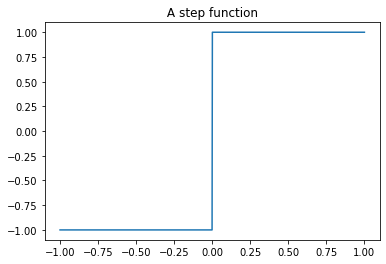

In [26]:
# Choose a grid x and a signal y
n = 1000
m = int(n/2)
print(m)
x = np.linspace(-1,1,n)
y = np.zeros_like(x)
y[m:] = 1
y[0:m] = -1
plt.plot(x,y)
plt.title(" A step function ");

In [27]:
# Use of FFT to compute the discrete Fourier transform
import scipy.fftpack as sf
spectre = sf.fft(y)
inverse_du_spectre = sf.ifft(spectre)

### Ex: Compute the $L^2$ of respectively the signal and its spectrum.

In [28]:
def normL2(y):
    yn = y/y.size # normalisation
    return np.sqrt(np.sum(np.abs(yn*yn)))

print('Norme L^2 du signal : ', normL2(y))
print('Norme L^2 du spectre :', normL2(spectre))

Norme L^2 du signal :  0.0316227766016838
Norme L^2 du spectre : 1.0000000000000002


### Ex: Check numerically that the FFT and IFFT are numerical inverse of each others.

In [31]:
print('Norme de (inverse_du_spectre-spectre) : ', normL2(spectre-y), '<< 1, donc la FFT et IFFT sont bien inverse numérique')

Norme de (inverse_du_spectre-spectre) :  1.0004998750624612 << 1, donc la FFT et IFFT sont bien inverse numérique


## Important remark:
The FFT output gives the DFT of the input for positive frequencies starting from $0$ on the first half of the vector and the negative frequencies on the second half starting always in increasing order. More precisely, we have that, if $y$ is the output,
$[y(0),y(1),..,y(n/2),y(1-n/2),...,y(-1)] $       if $n$ is even, $[y(0),y(1),..,y((n-1)/2),y(-(n-1)/2),...,y(-1)]$ otherwise.
In general, always use $fftshift$ to put low frequencies in the middle, which is the customary representation of the FFT.

Text(0.5, 1.0, ' The 0 frequency is in the middle. ')

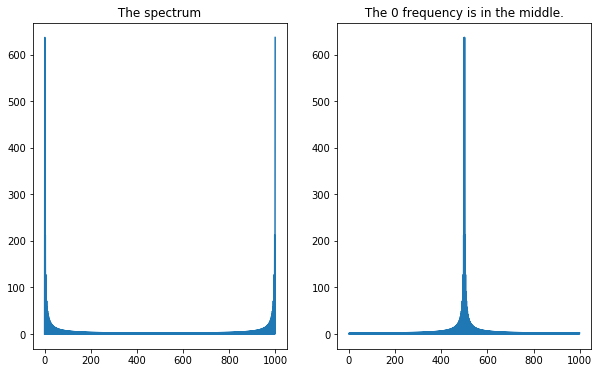

In [32]:
# illustration.
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(np.abs(spectre))
plt.title(" The spectrum ")
plt.subplot(1,2,2)
plt.plot(np.abs(sf.fftshift(spectre)))
plt.title(" The 0 frequency is in the middle. ")

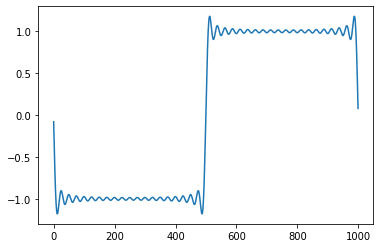

In [33]:
reduced = np.copy(spectre)
h = 40
reduced[h:n-h] = 0
reconstruct=sf.ifft(reduced)
plt.plot(np.real(reconstruct))

### Ex: Read the script above and explain what it does. The illustrated phenomenon is called the Gibbs phenomenon and is due to the slow convergence of the Fourier serie at the discontinuites of the signal.

On obtient un signal filtré à l'aide d'un passe-bas (les hautes fréquences sont coupées).

C:\Users\Laurine\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


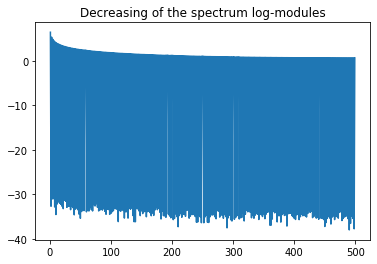

In [34]:
plt.title("Decreasing of the spectrum log-modules")
fq = spectre[0:m]
plt.plot(np.log(np.abs(fq)))

### Ex: What can be observed on the shape of the spectrum ?



### Plot odd and even coefficients. Can you explain why?
### Why did we consider half of the signal?


Text(0.5, 1.0, 'Even coeff')

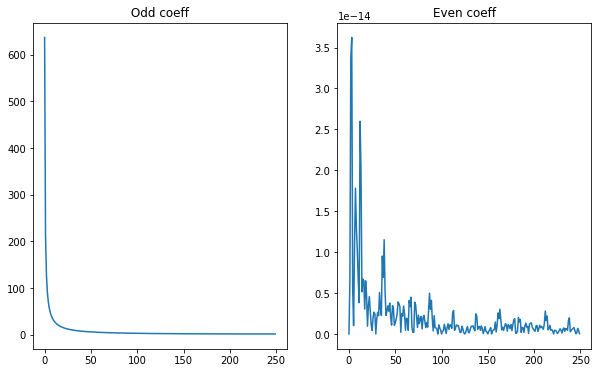

In [35]:
odd = fq[1::2]
even = fq[0::2]

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.plot(np.abs(odd))
plt.title(" Odd coeff ")
plt.subplot(1,2,2)
plt.plot(np.abs(even))
plt.title("Even coeff")

1 valeur sur 2 est nulle : c'est pour cela que l'on considère uniquement la moitié du signal

## B. On an image.

In [36]:
import scipy.signal as sig
from scipy import misc

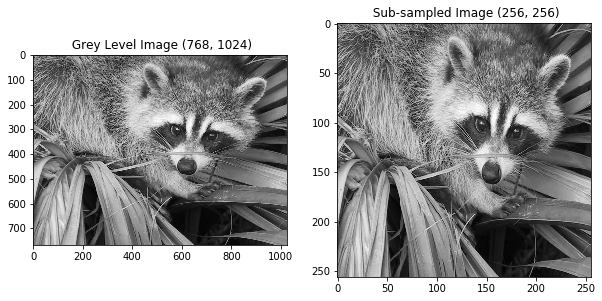

In [37]:
# load an image
image = misc.face(gray=True).astype(np.float32)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Grey Level Image " + str(np.shape(image)))
plt.imshow(image)
# sub-sample a matrix
image_sub = image[::3,::4]
plt.subplot(1,2,2)
plt.gray()
plt.title(" Sub-sampled Image " + str(np.shape(image_sub)))
plt.imshow(image_sub)

### Hereafter, we represent the logarithm of the module of the image spectrum.

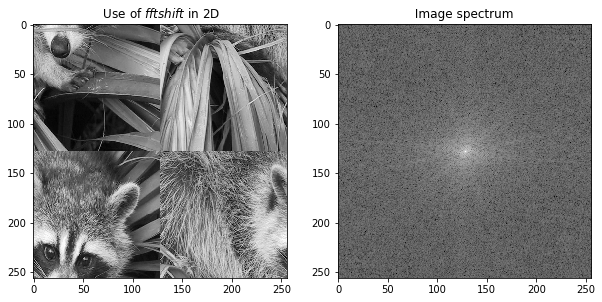

In [38]:
spectre_im = sf.fft2(image_sub)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.gray()
plt.title(" Use of $fftshift$ in 2D ")
plt.imshow(sf.fftshift(image_sub))
plt.subplot(1,2,2)
plt.gray()
plt.title(" Image spectrum ")
plt.imshow(sf.fftshift(np.log(np.abs(spectre_im))))

### Ex: Explain what is the reason of appearance of the white lines in the frequency representation of the image. Propose and implement a solution to get rid of this artifact. We advise to use a mask on the intial image defined using $\sin$ or $\cos$ and then to compute the FFT.

Les artefacts proviennent de la discontinuité lors du recollement de l'image (elle est sous échantillonnée).

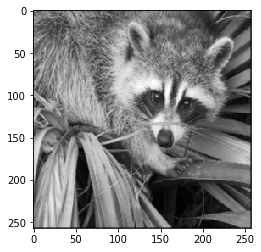

In [47]:
def signal_porte(t):
    return ((t > -1/2) * (t < 1/2))

def gaussienne(x, sigma):
    return np.exp(-np.power(x, 2)/sigma**2)

t = np.linspace(-1,1,100)
signal_gauss = (gaussienne(t, 0.5))
signal_gauss = signal_gauss / np.sum(signal_gauss)
porte = signal_porte(np.linspace(-1,1,1000))
porte = porte / np.sum(porte)

def gaussianKernel(X,Y):
    K = np.zeros((X,Y))
    for x in range(X):
        for y in range(Y):
            x_ = x / (X-1) - 0.5
            y_ = y / (Y-1) - 0.5
            K[x,y] = gaussienne(x_,20) * gaussienne(y_, 20)
    return K / np.sum(K)

kernel = gaussianKernel(2,2)

plt.imshow(sig.convolve2d(image_sub,kernel))

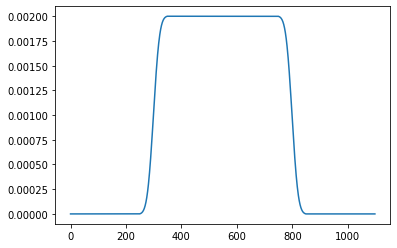

In [48]:
# VERSION 2
plt.plot(np.convolve(signal_gauss,porte))

## Hereafter, we construct an image from a random modification of the phase of the FFT of an image, which contains what is called texture information, that is repetitive patterns.

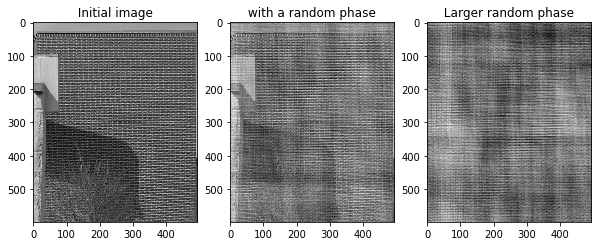

In [60]:
import imageio as imio
bois = imio.imread('Moire.jpg')
texture_im = np.sum(bois*[ 0.21, 0.72 ,0.07],axis=-1)
spectre_im = sf.fft2(texture_im)
# construct the random phase. 
plt.figure(figsize = (10,10))
temp = 0.3 * np.random.rand(*np.shape(spectre_im))
random_phase = np.cos(2*np.pi * temp) + np.sin(2*np.pi*temp)*1j
new_spectrum = spectre_im*random_phase
temp_2 = 30 * temp
random_phase_2 = np.cos(2*np.pi * temp_2) + np.sin(2*np.pi*temp_2)*1j
new_spectrum_2 = spectre_im*random_phase_2
plt.subplot(1,3,1)
plt.title(" Initial image ")
plt.imshow(texture_im)
plt.subplot(1,3,2)
plt.title(" with a random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum)))
plt.subplot(1,3,3)
plt.title(" Larger random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum_2)))

## Ex: Redo the experiment with the animal image. What do you observe?

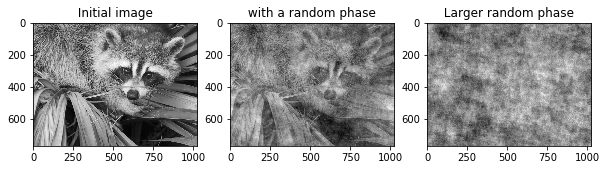

In [61]:
racoon = misc.face()
texture_im = np.sum(racoon*[ 0.21, 0.72 ,0.07],axis=-1)
spectre_im = sf.fft2(texture_im)
# construct the random phase. 
plt.figure(figsize = (10,10))
temp = 0.3 * np.random.rand(*np.shape(spectre_im))
random_phase = np.cos(2*np.pi * temp) + np.sin(2*np.pi*temp)*1j
new_spectrum = spectre_im*random_phase
temp_2 = 30 * temp
random_phase_2 = np.cos(2*np.pi * temp_2) + np.sin(2*np.pi*temp_2)*1j
new_spectrum_2 = spectre_im*random_phase_2
plt.subplot(1,3,1)
plt.title(" Initial image ")
plt.imshow(texture_im)
plt.subplot(1,3,2)
plt.title(" with a random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum)))
plt.subplot(1,3,3)
plt.title(" Larger random phase ")
plt.imshow(np.real(sf.ifft2(new_spectrum_2)))

The racoon is blurred

## 3. Convolution.

### Ex: Construct a gaussian filter of size $(256,256)$ and make a convolution of the animal image with this filter. Then, show the image and zoom in a particular region to better see the effect of the convolution when the filter has a small standard deviation.

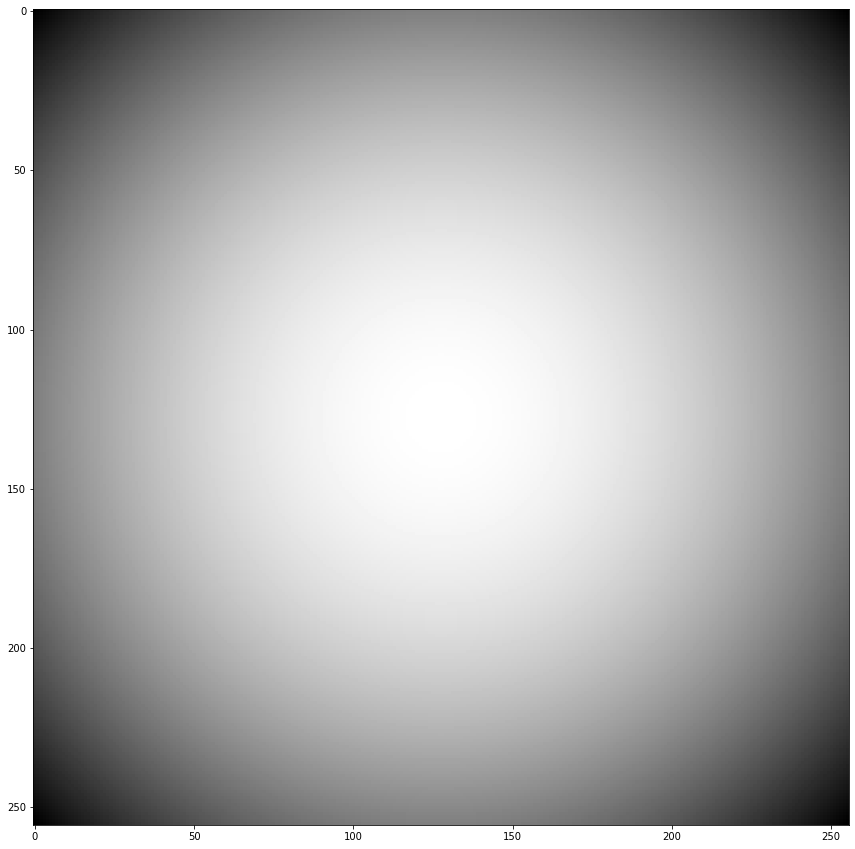

In [64]:
### Construct a gaussian filter.

def gaussienne(x, sigma):
    return np.exp(-np.power(x, 2)/sigma**2)

t = np.linspace(-1,1,100)
signal_gauss = (gaussienne(t, 0.5))
signal_gauss = signal_gauss / np.sum(signal_gauss)

def gaussianKernel(X,Y):
    K = np.zeros((X,Y))
    for x in range(X):
        for y in range(Y):
            x_ = x / (X-1) - 0.5
            y_ = y / (Y-1) - 0.5
            K[x,y] = gaussienne(x_,20) * gaussienne(y_, 20)
    return K / np.sum(K)

kernel = gaussianKernel(256,256)
fig = plt.figure(figsize=(15,15))
plt.imshow(kernel)

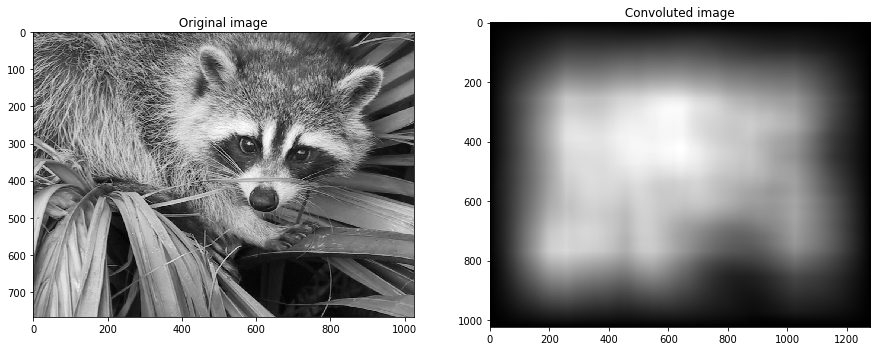

In [66]:
fig = plt.figure(figsize=(15,15))
plt.gray()  # show the filtered result in grayscale
plt.subplot(1,2,1)
plt.title(" Original image ")
plt.imshow(image)

convoluted_image = sig.convolve2d(image,kernel)

plt.subplot(1,2,2)
plt.title(" Convoluted image ")
plt.imshow(convoluted_image)
plt.show()

## Ex: Suppressing the aliasing effect. 
### Start with the arch image at full resolution, convolve it with a gaussian filter and subsample it as done in the aliasing experiment. Vary the constant of the gaussian filter and try to suppress the aliasing.

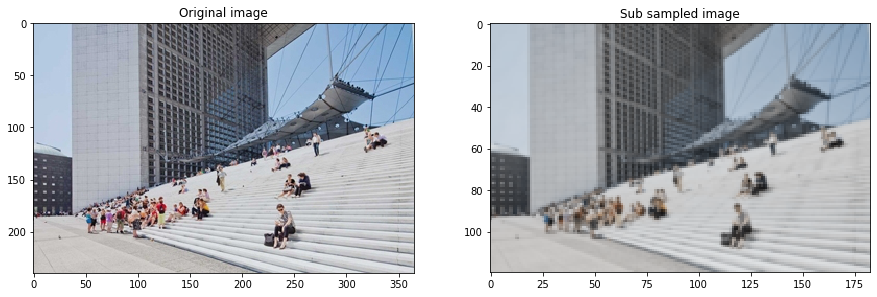

In [67]:
from scipy.ndimage import gaussian_filter

sigma = 1
arch = imio.imread('services_0.jpg')

fig = plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(arch)

convoluted = gaussian_filter(arch, sigma=sigma)
sub_sampled = convoluted[::2,::2]

plt.subplot(1,2,2)
plt.title("Sub sampled image")
plt.imshow(sub_sampled)
plt.show()

### Answer: $#############$.

## 3. Linear and non-linear approximation.

In [70]:
### We define two measures to quantify the quality of the signal with respect to the ground truth.
### It is a quantity that is computed between x,y two images. They are called peaked signal to noise ratio,
### and signal to noise ration (psnr and snr).
def psnr(x, y, vmax=-1):
    d = np.mean((x - y) ** 2)
    if d ==0:
        return "Equal inputs"
    if vmax < 0:
        m1 = abs(x).max()
        m2 = abs(y).max()
        vmax = max(m1, m2)
    
    return 10 * np.log10(vmax ** 2 / d)

def snr(x, y):
    s =  np.linalg.norm(x - y)
    if s == 0:
        return "Equal inputs"
    return 20 * np.log10(np.linalg.norm(x) /s)

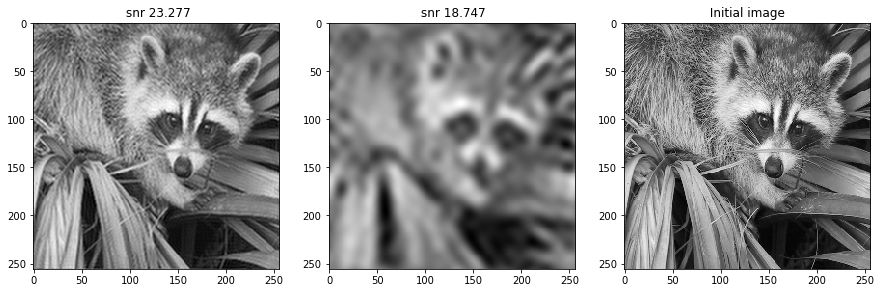

In [71]:
def LinearApproximation(x,n):
    if 2*n>=np.max(np.shape(x)):
        print ("n out of bounds")
        return x
    spectre = sf.fftshift(sf.fft2(x))
    filtre = np.zeros_like(x)
    filtre[n:-n,n:-n] = 1
    result = np.real(sf.ifft2(sf.fftshift(filtre*spectre)))
    return result
approx1 = LinearApproximation(image_sub,60)
approx2 = LinearApproximation(image_sub,115)
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.title(" snr " + str(round(psnr(image_sub,approx1),3)))
plt.imshow(approx1)
plt.subplot(1,3,2)
plt.title(" snr " + str(round(psnr(image_sub,approx2),3)))
plt.imshow(approx2)
plt.subplot(1,3,3)
plt.title(" Initial image ")
plt.imshow(image_sub);

### Ex. Explain what is done in the previous cell.

Une image bruitée est créée avec un filtre. On perd donc de l'information dans l'image. Vient ensuite le calcul du ration signal/bruit pour quantifier comment l'image est filtrée.

### Ex: Redo the experiment but in considering the non-linear approximation of the image by taking the first $M$ larger coefficients in the spectrum. 
### Compare the linear and the non-linear approximation.

In [72]:
def NonLinearApproximation(x,n,m):
    if 2*n>=np.max(np.shape(x)):
        print ("n out of bounds")
        return x
    spectre = sf.fftshift(sf.fft2(x))
    filtre = np.zeros_like(x)
    filtre[n:-n,n:-n] = 1
    result = np.real(sf.ifft2(sf.fftshift(spectre * filtre)))
    return result

### Your answer here. $#############$.

## 4. STFT  (Short Time Fourier Transform) and source separation.

### In this part, we use STFT which is a collection of Fourier transform of a 1D signal on time subintervals. We use it in order to experiment source separation which comes from the idea that the different signals may present very different behaviour in the frequency domain.

In [79]:
# utils to load the sounds.
import numpy as np
import wave as wv

def load_sound(file, n0):
    
    x_raw = wv.open(file)
    n = x_raw.getnframes()
    x = np.frombuffer(x_raw.readframes(-1), 'Int16')
    x_raw.close()

    if n0 !=0 and n0 < n:
        x = x[:n0]
    
    return x/np.max(x)

## Hereafter, we load the $3$ sounds and plot the second one.

In [82]:
n = 1024*16
s = 3 #number of signals.
x = np.zeros([n,3])
x[:,0] = load_sound("bird.wav",n)
x[:,1] = load_sound("female.wav",n)
x[:,2] = load_sound("male.wav",n)
'''
x = x/np.tile(np.std(x,0),(n,1))
p = 2 #number of micros
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.xlim(0,n)
plt.plot(x[:,2])'''

C:\Users\Laurine\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


Error: unknown format: 85

### We simulate two micros which are implemented by linear combinations of the signals.

In [83]:
theta = np.linspace(0, np.pi, s + 1)[:-1]
theta[0] = .2
M = np.vstack((np.cos(theta), np.sin(theta)))
## recovered signals
y = np.dot(x,np.transpose(M))

### We use the STFT function from the python package signal and plot it.

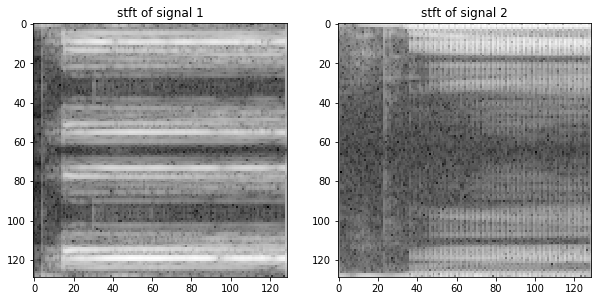

In [84]:
import scipy.signal as sig
f,t,w = sig.stft(x[:,0])
a,b,z = sig.stft(x[:,1])
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("stft of signal 1")
plt.imshow(np.log(np.abs(w)))
plt.subplot(1,2,2)
plt.title("stft of signal 2")
plt.imshow(np.log(np.abs(z)))

### We numerically check that the STFT and ISTFT are indeed inverse from each others.

In [85]:
micro1 = y[:,0]
micro2 = y[:,1]
stft = lambda im : sig.stft(im,noverlap = 64,nperseg = 128)
istft = lambda im : sig.istft(im,noverlap = 64,nperseg = 128)
f,t,w1 = stft(micro1)
f,t,w2 = stft(micro2)
t,recov = istft(w1)
print(np.sum((micro1 - recov)**2))

9.680658825873376e-29


### By selecting randomly a group of points in time, we plot in the plane the coordinates of the points, being the measured signals by the micros.

16384


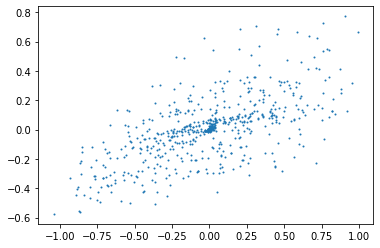

In [90]:
nbre_selec = 600
from random import shuffle
print(np.shape(y)[0])
liste = list(range(np.shape(y)[0]))
shuffle(liste)
plt.plot(y[liste[0:nbre_selec],0],y[liste[0:nbre_selec],1],"o",markersize=1)

### Q: Do the same with the STFT signals, what do you observe ?

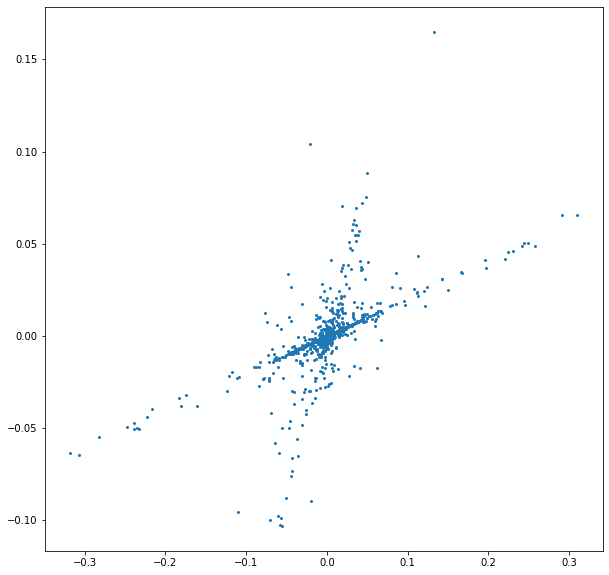

In [91]:
nbre_selec = 3000
from random import shuffle
H = np.asarray([np.imag(w1.flatten()),np.imag(w2.flatten())]).transpose()
liste2 = list(range(np.shape(H)[0]))
shuffle(liste2)
plt.figure(figsize = (10,10))
plt.plot(H[liste2[0:nbre_selec],0],H[liste2[0:nbre_selec],1],"o",markersize=2);

### Q. Comment the code below after running it.

In [95]:
import math 
Theta = np.zeros(np.shape(H)[0])
for i in range(np.shape(H)[0]):
    Theta[i] = math.atan2(H[i,1],H[i,0])%np.pi
print(np.shape(Theta))

(16705,)


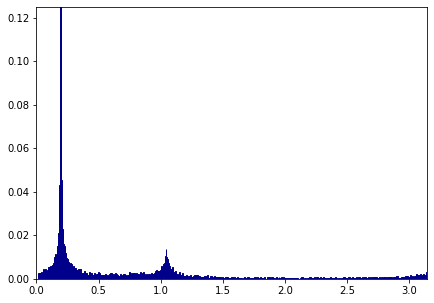

In [96]:
nbins = 400
t = np.linspace(np.pi/200,np.pi,nbins)
hist = np.histogram(Theta[:10000],t)
h = hist[0]/np.sum(hist[0])
t = t[:-1]

plt.figure(figsize = (7,5))
plt.bar(t, h, width = np.pi/nbins, color = "darkblue", edgecolor = "darkblue")
plt.xlim(0,np.pi)
plt.ylim(0,np.max(h))
plt.show()

In [97]:
## Affiche les valeurs d'angles les plus importantes.
theta = []
for xx in (h>0.01)*t:
    if xx>0:
        theta.append(xx)
print(theta)

[0.15672531771855847, 0.16455961518803677, 0.17239391265751508, 0.1802282101269934, 0.1880625075964717, 0.19589680506595, 0.20373110253542828, 0.2115654000049066, 0.2193996974743849, 0.2272339949438632, 0.2350682924133415, 1.0341666343001286, 1.0420009317696068]


### Q. Comment the code below after running it ?

In [98]:

projections = np.dot(Estimated,W)
C = np.abs(projections)
temp = np.max(C,0)
I = np.argmax(C,0)
threshold = .005
D = np.sqrt(np.sum(W**2, 0))
print(np.shape(D))
I = I*(D > threshold)

NameError: name 'Estimated' is not defined

In [99]:

masque = np.zeros_like(projections)
for i in range(np.shape(masque)[0]):
    masque[i] = 1*(I==i)
source_stft = projections * masque
print(np.shape(source_stft))

NameError: name 'projections' is not defined

In [100]:

MaListe = []
for i in range(3):
    f,t,w = stft(x[:,i])
    MaListe.append(w)
    print(np.shape(w))
    print(i,snr(np.abs(w.flatten()),np.abs(source_stft[i,:])))

(65, 257)


NameError: name 'source_stft' is not defined

In [ ]:
print(np.shape(MaListe[1]))

IndexError: list index out of range

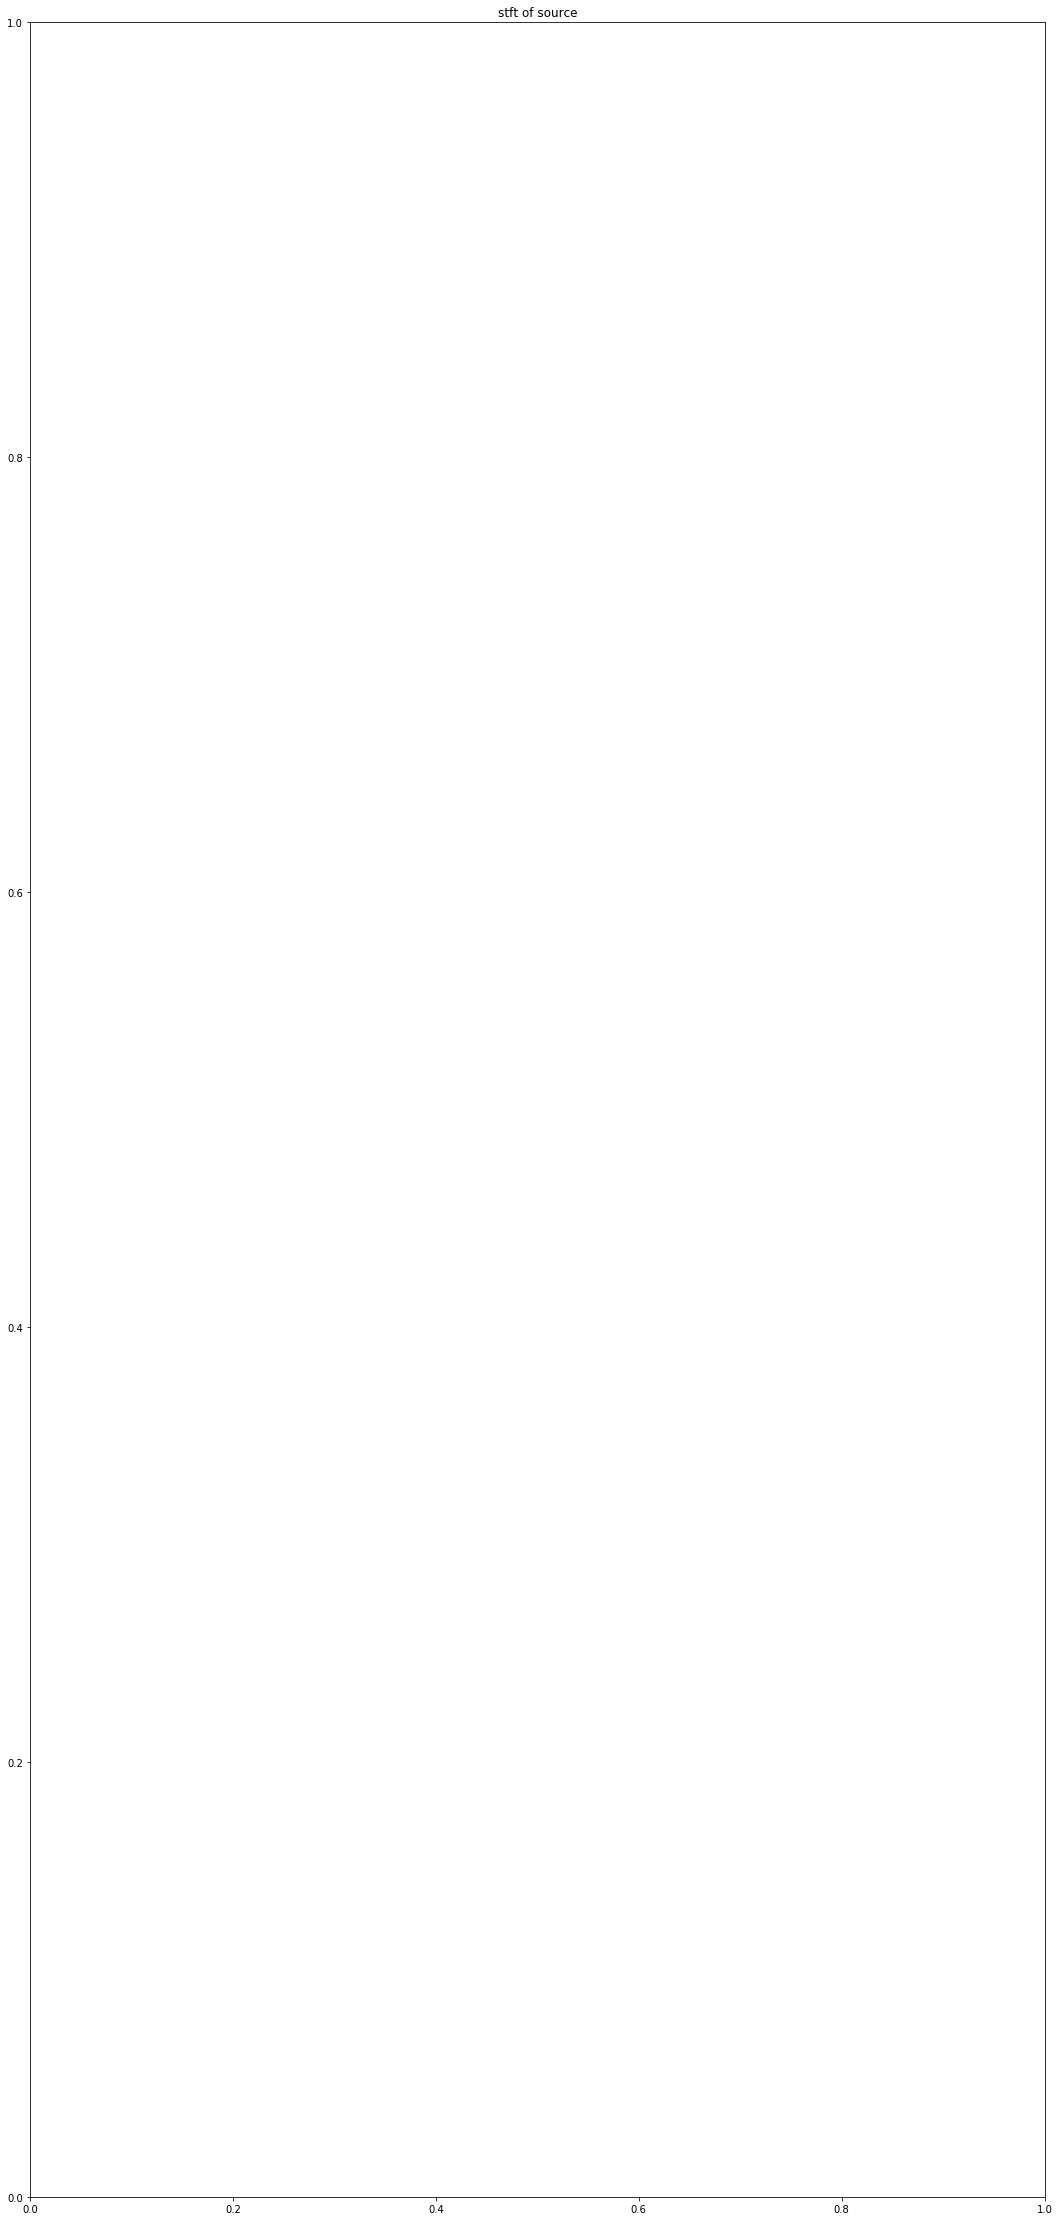

In [101]:
i = 1
plt.figure(figsize = (40,40))
plt.subplot(1,2,1)
plt.title("stft of source")
plt.imshow(np.log(np.abs(MaListe[i])))
plt.subplot(1,2,2)
plt.title("stft of recovered signal")
plt.imshow(np.log(np.abs(source_stft[i,:]) + 1e-10).reshape(np.shape(MaListe[i])))


In [102]:
X = []
for i in range(3):
    temp = source_stft[i,:].reshape(np.shape(MaListe[i]))
    X.append(istft(temp)[1])
h = X[0]
print(np.shape(h))

NameError: name 'source_stft' is not defined

In [ ]:
i = 0
l = 600
m = 8000
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.title("recovered")
plt.xlim(l,m)
plt.plot(X[i])
plt.subplot(1,2,2)
plt.title("source")
plt.xlim(l,m)
plt.plot(x[:,i])
print(snr(X[i],x[:,i]))